<a href="https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/solutions/Solutions8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAO/LIP Python Primer Course Exercise Set 8

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/acorreia61201/SAOPythonPrimer/blob/main/exercises/Exercises8.ipynb)

## Exercise 1: The Gamma Function

In some previous exercises, we've used the *factorial*. For an integer $n$, its factorial $n!$ is the product of all positive integers before it. For example, $4! = 1 \cdot 2 \cdot 3 \cdot 4 = 24$.

Notice the emphasis on *integers*; the factorial is undefined for non-integer real numbers. We can generalize the concept of the factorial using the *gamma function*, defined below:

\begin{equation}
\Gamma (z) = \int_0^{\infty} t^{z-1}e^{-t} dt
\end{equation}

This function requires that $z > 0$ for real output. If $z$ is an integer, $\Gamma(z) = (z-1)!$. The definition of $\Gamma$ is generally a *nonelementary integral*, meaning we can't use calculus techniques to solve it (the exception is when $t$ is an integer). We can, however, use numerical techniques to approximate its value.

**Your task:** Write the definition of $\Gamma(z)$ as a function, setting $z$ to a value of your choice. Using `scipy.integrate.quad()`, integate this function from 0 to the upper bounds $(1, 5, 10, 50, 100, 1000, \infty)$ and print out their values. (Hint: You can use `numpy.inf` for the last one.)

Compare these values to the output of `scipy.special.gamma(z)` using the $z$ value you chose. How quickly does the integral converge to the true value? How accurate is the integral over $[0, \infty]$ to the gamma function?

In [ ]:
from scipy import special, integrate
import numpy as np

# define the integrand from above
def integrand(t, z):
    return t**(z-1)*np.exp(-t)

# integrate with various bounds
uppers = [1, 5, 10, 50, 100, 1000, np.inf] # upper bounds from above
for i in uppers:
    approx = integrate.quad(integrand, 0, i, args=(5,)) # the args keyword allows us to pass an extra argument to the integrand fn; in this case, we set z to 5 (the first var we're not integrating)
    print(f'Integral = {approx[0]} for i = {i}') # we should get (5-1)! = 4! = 24 as the upper bound -> inf; we get out a tuple of (value, error), and we only want the first element

print(f'True value: {special.gamma(5)}') # true value for comparison

Integral = 0.0878363238562491 for i = 1
Integral = 13.428161158434902 for i = 5
Integral = 23.29793548615293 for i = 10
Integral = 23.999999999999993 for i = 50
Integral = 23.999999999999993 for i = 100
Integral = 24.000000000000004 for i = 1000
Integral = 24.0 for i = inf
True value: 24.0


**Your task:** Now, let's compare the integrals to the function itself. Define an array of $z$ values ranging over $[0.01, 5.5]$, and do the same integrations as above by iterating over this array. One one axis, plot the integrals with dashed lines and the `scipy` gamma function with a solid black line. Label them accordingly. Also, plot the values of $1!$, $2!$, $3!$, and $4!$ as blue stars. How well do the functions match with the factorial values?

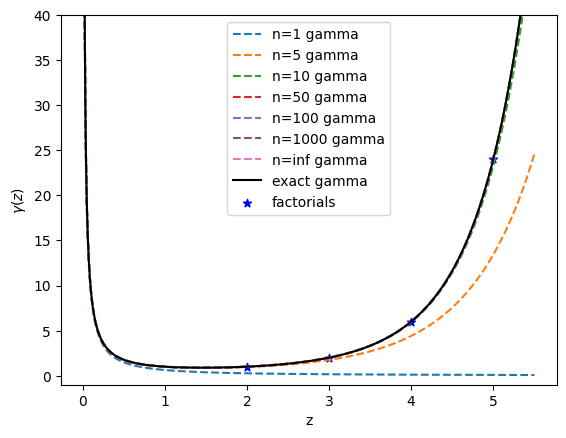

In [ ]:
import matplotlib.pyplot as plt

z_vals = np.linspace(0.01, 5.5, 500) # define an array

'''
Our goal is to generate a range of integral values for each upper bound over the domain of z_vals.
We can do this by iterating by the list uppers, and in each iteration looping over the values in z_vals.
For example, we'll start at n = 1 and integrate the gamma definition using all the z values above.
We'll plot these values as one line. Then, we'll move to n = 5 and do the same thing.
'''
# plot the integral lines
for n in uppers:
    ints = [] # placeholder for this bound's integral values
    for z in z_vals: # iterate over the z vals using the current upper bound
        ints.append(integrate.quad(integrand, 0, n, args=(z,))[0]) # calculate integrals over range of z values
    plt.plot(z_vals, ints, linestyle='dashed', label=f'n={n} gamma') # plot the values

# now, plot the exact function
plt.plot(z_vals, special.gamma(z_vals), color='black', label='exact gamma')

# finally, plot the exact points
x = [2, 3, 4, 5] # remember gamma(z) = (z-1)!; i.e. gamma(2) = 1!, gamma(3) = 2!, etc.
facts = [1, 2, 6, 24] # manually calculated
plt.scatter(x, facts, color='blue', marker='*', label='factorials')

plt.xlabel('z')
plt.ylabel(r'$\gamma(z)$')
plt.ylim(-1, 40) # adjusting axis for better visibility
plt.legend()

As you can probably tell, the factorial is a very quickly growing function, making computational calculations very lengthy and possibly inaccurate. We can remedy this by taking the natural logarithm of the factorial, massively reducing the scale of the problem. For extremely large values, it may be more convenient to use the *Stirling approximation*, which states:

\begin{equation}
\ln(n!) \approx n \ln n - n
\end{equation}

**Your task:** Use `scipy.special.gammaln()` and `numpy.geomspace()` to calculate the factorials of an array of 500 values on the range $[1, 10^{10}]$. Plot the absolute error between these values and the Stirling approximation on a loglog plot:

\begin{equation}
| \ln \Gamma(x) - (x \ln x - x) |
\end{equation}

How does the error change with increasing values of $x$?

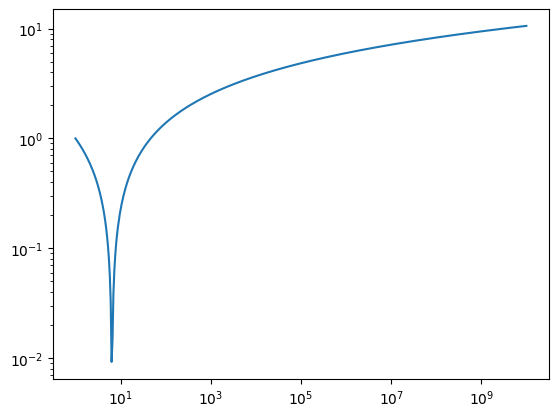

In [ ]:
dom = np.geomspace(1, 10**10, 500) # generate array (original value of 10**20 causes errors)
exact = special.gammaln(dom) # ln gamma values
stirling = dom*np.log(dom) - dom # stirling approximations
abs_errs = np.abs(stirling - exact) # absolute errors
plt.loglog(dom, abs_errs) # plot errs on a loglog scale

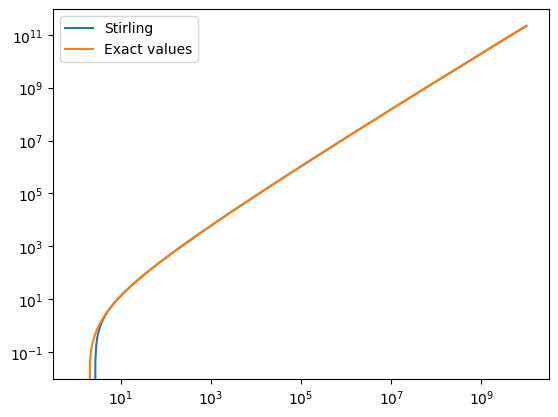

In [ ]:
'''
The result above is correct; the Sitrling approximation is accurate up to a factor of O(ln(x)), which increases as x increases.
This means that the approximation actually gets worse for higher x values, though a difference of ~10 at (10**10)! is still pretty good.
A more illustrative example would've been to plot the Stirling approx versus the exact gammaln values:
'''

plt.loglog(dom, stirling, label='Stirling') # stirling approx
plt.loglog(dom, exact, label='Exact values') # exact vals
plt.legend()

## Exercise 2: Pendulum Motion

A pendulum is a good way to introduce oscillatory motion. The exact equation for the motion of a pendulum with mass $m$ and string length $L$ is:

\begin{equation}
m\frac{d^2\theta}{dt^2} + \frac{mg\sin(\theta)}{L} = 0
\end{equation}

Here, $\theta$ is the angle of the pendulum relative to its stable equilibrium position. That is, $\theta = 0$ corresponds to the pendulum hanging straight down. As always, $g=9.81 m/s^2$ is the gravitational constant. We're assuming that the pendulum has no friction.

This is a second-order differential equation, and a pretty difficult one at that. We can simplify this by taking into account the angular velocity of the pendulum, which we define as $\omega = \frac{d\theta}{dt}$. Thus, we can split this second-order equation into a system of two first-order equations:

\begin{align}
\frac{d\omega}{dt} &= - \frac{g\sin(\theta)}{L} \\
\frac{d\theta}{dt} &= \omega
\end{align}

**Your task:** Define a function that encodes the above system of equations. It should take in the initial conditions vector, the parameter $L$, and time as inputs.

In [ ]:
def pendulum(t, y, L):
    '''
    System of 1D differential equations for pendulum motion

    y: array of the form [theta_0, omega_0]; the initial conditions
    t: time in seconds
    L: length of pendulum in meters
    '''
    return [y[1], -9.81*np.sin(y[0])/L] # return [dtheta/dt, domega/dt] from eqn above

Let's say I have a pendulum with $L = 0.3$ meters. I drop the pendulum (i.e. release from rest) from an angular position $\theta_0 = \pi/4$.

**Your task:** Use `scipy.integrate.ivp_solve()` to solve the equations of motion for the system over 10 seconds. Make a figure showing the angular position and velocity of the pendulum over time in two separate plots and label them accordingly.

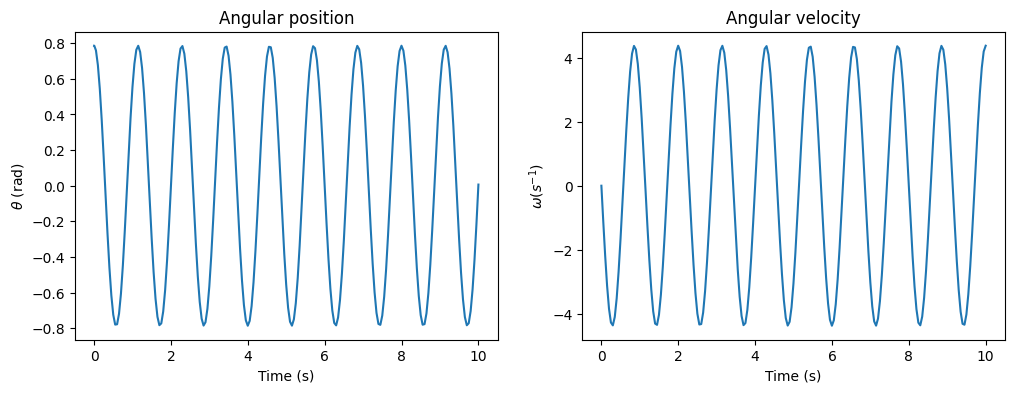

In [ ]:
y0 = [np.pi/4, 0] # initial conditions
path = integrate.solve_ivp(pendulum, (0, 10), y0, args=(0.3,), max_step=0.05) # integrate over t=(0, 10); set L=0.3 and set the max step size to 0.05 seconds

def plotter():
    '''
    Define a plotter for convenience. Remember that a function doesn't need inputs or outputs to work.
    '''
    times = path.t # times of integration
    thetas = path.y[0, :] # angles
    omegas = path.y[1, :] # angular velocities

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].plot(times, thetas) # plot positions
    ax[0].set_xlabel('Time (s)')
    ax[0].set_ylabel(r'$\theta$ (rad)')
    ax[0].set_title('Angular position')

    ax[1].plot(times, omegas) # plot velocities
    ax[1].set_xlabel('Time (s)')
    ax[1].set_ylabel(r'$\omega (s^{-1})$')
    ax[1].set_title('Angular velocity')

    plt.show()

plotter() # remember to call the function when you want to use it

**Your task:** Do the same as above, except now I release a pendulum with $L = 1.7$ meters from $30^o$. (Hint: You'll have to convert the angular value.) How do these plots differ from above? Try changing the initial conditions and parameters and see how they change.

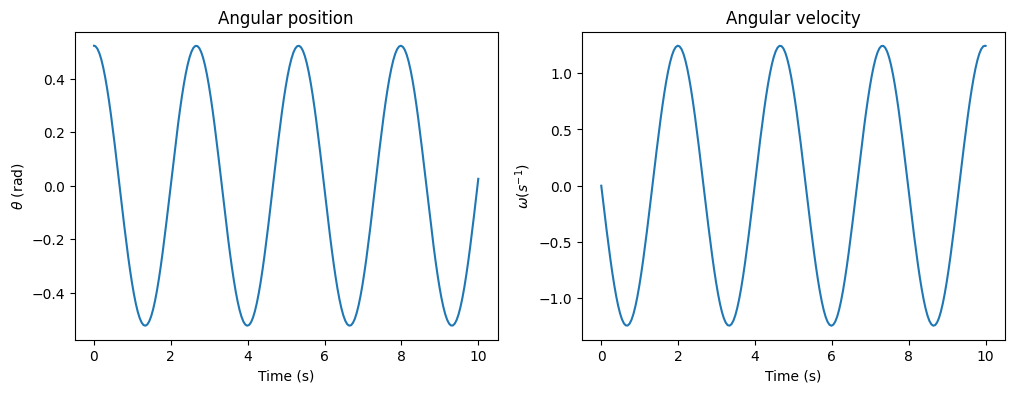

In [ ]:
y0 = [np.deg2rad(30), 0] # initial conditions (we can use deg2rad or realize 30 deg = pi/6)
path = integrate.solve_ivp(pendulum, (0, 10), y0, args=(1.7,), max_step=0.05) # integrate over t=(0, 10); set L=1.7 and set the max step size to 0.05 seconds
plotter() # plot the results

Even the above system of first-order equations is difficult to solve analytically. If we wanted to do this by hand, we can make an assumption that $\theta$ is small, and we can approximate $\sin(\theta) \approx \theta$ (this comes from the series approximation we've looked at before). The second-order equation then becomes:

\begin{equation}
m\frac{d^2\theta}{dt^2} + \frac{mg\theta}{L} = 0
\end{equation}

We can easily solve this using properties of trig functions to get an exact equation of motion solution:

\begin{equation}
\theta(t) = \theta_0\cos\bigg( \sqrt{\frac{g}{L}}t\bigg)
\end{equation}

**Your task:** Solve for the motion of the initial pendulum ($L=0.3$) under five scenarios: $(\theta_0, \omega_0) = (5^o, 0), (10^o, 0), (15^o, 0), (20^o, 0), (25^o, 0)$ over 10 seconds each. Plot the positions in each of these scenarios versus time in separate plots. In the same plots, overlay the analytic solution above with a dashed line. Title the plots accordingly by the initial angles. How do the numerical solutions compare to the analytic solutions in each case? What can we consider to be "small" for the approximation to hold?

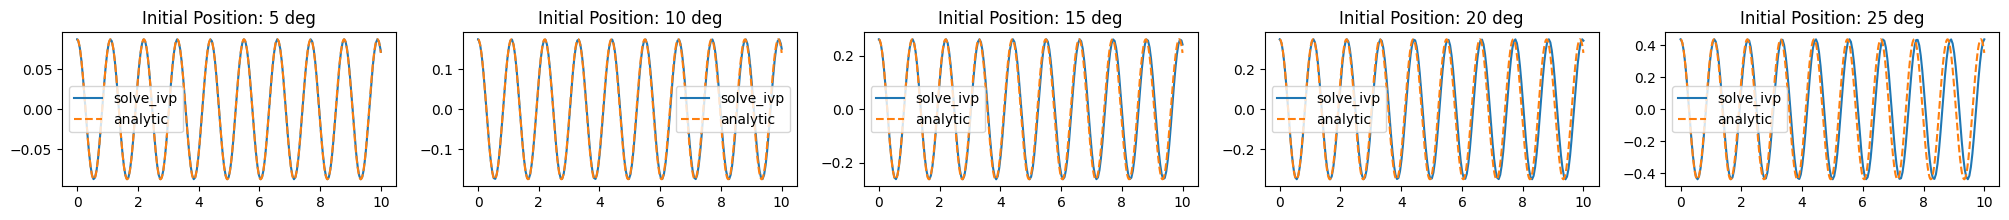

In [ ]:
angles = [5, 10, 15, 20, 25] # initial angles
times = np.linspace(0, 10, 500) # grid of times for plotting analytic solutions
fig, ax = plt.subplots(1, 5, figsize=(25, 2)) # set up figure with five sets of axes

for i in range(5): # iterate over the indices
    # calculate the analytic result
    angle = np.deg2rad(angles[i]) # convert angle to radians
    ana_soln = angle*np.cos(np.sqrt(9.81/0.3)*times) # compute analytic solution using angle and times array

    # use scipy to solve the system
    y0 = [angle, 0] # initial conditions on this iteration
    path = integrate.solve_ivp(pendulum, (0, 10), y0, args=(0.3,), max_step=0.05) # integrate over t=(0, 10); set L=0.3 and set the max step size to 0.05 seconds
    ts = path.t # times of integration
    ps = path.y[0, :] # angles

    # plot on the axes created outside the loop
    ax[i].plot(ts, ps, label='solve_ivp') # scipy solution plot
    ax[i].plot(times, ana_soln, label='analytic', linestyle='dashed') # analytic solution plot
    ax[i].set_title(f'Initial Position: {angles[i]} deg') # title based on initial position
    ax[i].legend()

## Exercise 3: The SIR Model

The *SIR model* is a simple method of modelling the spread of an infectious disease in a population. It assumes that a population of size $N$ can be split into three groups that change in size over time as the disease spreads:

- the susceptible population $S(t)$, containing those who are able to contract the disease. We assume that everyone that hasn't contracted the disease can contract it.
- the infected population $I(t)$, containing those who currently have the disease and can spread it.
- the recovered population $R(t)$, containing those who have had the disease and have since become immune. We assume that there are no "carriers", i.e. that people who have recovered cannot spread the disease further. We also assume that the disease is non-lethal, so the population size doesn't change.

We model the infectivity of the disease with two parameters $\beta$ and $\gamma$. $\beta$ measures the *contact rate* of individuals in the population, such that each day the average person infects $\beta N$ other people. $\gamma$ measures the *mean recovery rate*, such that an infected person remains infective for $1/\gamma$ days.

We can model the change over time in the populations $S$, $I$, and $R$ using a system of differential equations:

\begin{align}
\frac{dS}{dt} &= -\frac{\beta SI}{N} \\
\frac{dI}{dt} &= \frac{\beta SI}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{align}

By supplying an initial condition vector $y = [S(0), I(0), R(0)]$, we can integrate the above conditions and get three curves that model the three populations over time.

**Your task:** Write a function that encodes the system of equations above. The function should take in the initial conditions vector, infectivity parameters, population size, and time as inputs.

In [ ]:
def sir(t, x, b, y, N):
    '''
    System of 1D eqns from the SIR model.

    t: time, the variable of differentiation
    x: a vector of the form [S, I, R]
    b: the beta factor (contact rate)
    y: the gamma factor (mean recovery rate)
    N: size of the population
    '''
    S, I, R = x # get values of S, I, R from input
    return [-b*S*I/N, b*S*I/N - y*I, y*I] # return new S, I, R values using eqns above

Let's start with a simple example. At a school with $N=1000$ initially healthy students and faculty, one student comes in with the flu. On average, an infected individual spreads flu to $\beta = 0.6$ other people, and this strain of flu has an average infectious period of $1/\gamma = 5$ days.

**Your task:** Set up the above scenario. Use `scipy.integrate.odeint()` to solve the system of equations using the function you defined above for 100 days. Plot the $S$, $I$, and $R$ curves, labelling each curve and the axes accordingly.

Play around with the parameters. What happens if $\beta$ increases and decreases? What about $\gamma$? Or $N$?

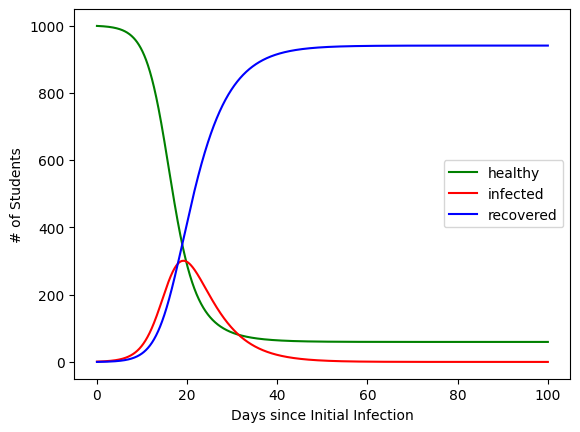

In [ ]:
# here I mention odeint(); this is an older version of solve_ivp; generally you should use the latter

# initial conditions
N = 1000
b = 0.6
y = 1/5
I0 = 1 # initial number of infected
R0 = 0 # no one has recovered since no one's caught the flu yet
S0 = N - I0 - R0 # for consistency, we can define S so we know S + I + R = N
x0 = [S0, I0, R0] # initial conditions vector

# solve the IVP
soln = integrate.solve_ivp(sir, (0, 100), x0, args=(b, y, N), max_step=0.05) # evaluate with x0 over 100 days; set parameters and max step as before
times = soln.t
S = soln.y[0, :]
I = soln.y[1, :]
R = soln.y[2, :]

# plot the results
plt.plot(times, S, color='green', label='healthy')
plt.plot(times, I, color='red', label='infected')
plt.plot(times, R, color='blue', label='recovered')
plt.xlabel('Days since Initial Infection')
plt.ylabel('# of Students')
plt.legend()

Let's try a real-life example using COVID-19. Current models estimate that COVID-19 has a peak infectious period of $1/\gamma = 10$ days after symptoms start. Let's model a city that has $N = 1,000,000$ totally healthy people, assuming that no one moves in or out during that period. Of this population, let's say $I(0) = 10$ people return from a bus trip on which they contracted COVID-19.

We'll model three scenarios:

- About $10 \%$ of the population wears a mask and practices social distancing, which we'll assign an average contact rate of $\beta = 0.9$
- About half of the population wears a mask and social distances, which we'll assign $\beta = 0.5$
- About $90 \%$ of the population wears a mask and social distances, which we'll assign $\beta = 0.1$

We'll assume that repeat infections aren't a factor. We'll also assume that vaccines aren't in consideration; either this scenario was pre-2021 or this is some "super-variant" of COVID-19 that completely bypasses them.

**Your task:** Solve the system of differential equations for $200$ days. Plot these three scenarios in the same figure, titling each of them accordingly. Again, label the $S$, $I$, and $R$ curves and the axes accordingly.

Take note of the shapes of the curves. In which scenario does the number of infected peak the fastest, and which one the slowest? Which scenarios have the highest and lowest peak infected? How does the final number of recovered individuals change in the three scenarios?

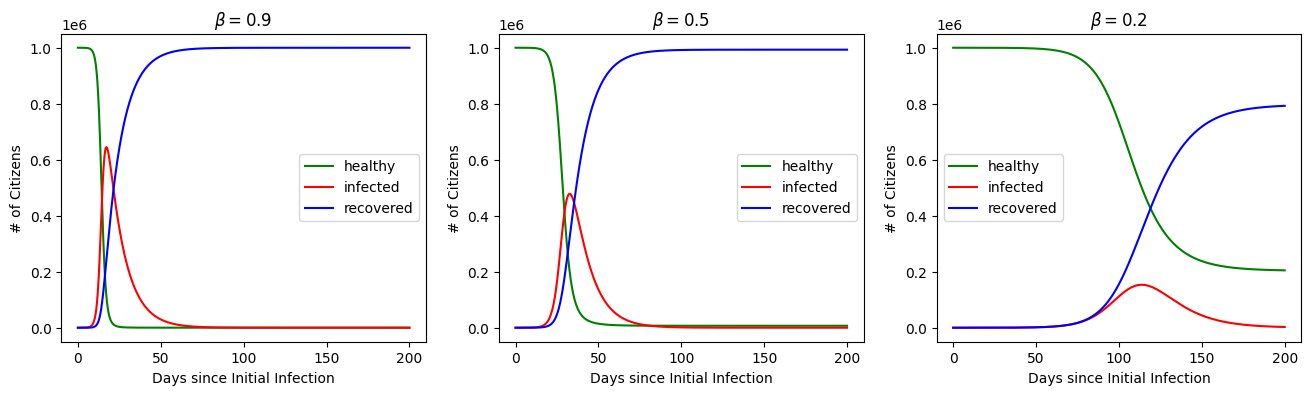

In [ ]:
# initial conditions
N = 10**6
betas = [0.9, 0.5, 0.2] # set of contact rates to iterate over
I0 = 10
R0 = 0
S0 = N - I0 - R0
y = 1/10
x0 = [S0, I0, R0]

# set up figure
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
for i in range(3):
    soln = integrate.solve_ivp(sir, (0, 200), x0, args=(betas[i], y, N), max_step=0.05) # evaluate with x0 over 200 days; use betas[i] value for beta
    times = soln.t
    S = soln.y[0, :]
    I = soln.y[1, :]
    R = soln.y[2, :]

    # plot the results
    ax[i].plot(times, S, color='green', label='healthy')
    ax[i].plot(times, I, color='red', label='infected')
    ax[i].plot(times, R, color='blue', label='recovered')
    ax[i].set_xlabel('Days since Initial Infection')
    ax[i].set_ylabel('# of Citizens')
    ax[i].legend()
    ax[i].set_title(rf'$\beta = {betas[i]}$')

'''
The change in the lines using beta = 0.1 is too small to see using this plot size, so I've used 0.2 instead.
The main thing you should see is that lower beta values result in less people getting infected at once (i.e. the peak in the I curve is lower).
However, lower beta values also mean that new people will be getting sick for a longer time, as opposed to higher values where the population gets "burned out" faster.
'''